# Введение в Машинное обучение

## Высшая Школа Цифровой Культуры

## Материалы к лекции 3. Логистическая регрессия

Обработка данных

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
#чтение данных, так как названия конфет уникальны, используем их в качестве индекса
import pandas as pd
DATA = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/week6/candy-data.csv", delimiter=',', index_col='competitorname')

In [30]:
#обучение модели будем проводить на данных, за исключением некоторых конфет
train_data = DATA.drop(['Chewey Lemonhead Fruit Mix', 'Runts', 'Sixlets'])

In [31]:
#отбор данных для предикторов, удаление дввух последних столбцов, индекс не включается в данные автоматически.
X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))

In [32]:
#отбор столбца для отклика
y = pd.DataFrame(train_data['Y'])

Обучение модели логистической регрессии

In [33]:
#подключение модели логистической регрессии из библиотеки sklearn
from sklearn.linear_model import LogisticRegression

In [34]:
#обучение модели
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y.values.ravel())

Предсказание результатов с помощью обученной модели

In [35]:
#предсказание для сладости, введенной вручную, вероятности указаны для классов 0 и 1 соответственно 
reg.predict_proba([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0.64, 0.76]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[0.13650776, 0.86349224]])

In [36]:
#предсказание для сладости из таблицы
#выбор строки из таблицы
AirHeads = DATA.loc['Air Heads',:].to_frame().T
#отбор данных для предикторов и предсказание
reg.predict(AirHeads.drop(['winpercent', 'Y'], axis=1))

array([0])

Оценка модели с помощью тестовых данных

In [37]:
#чтение тестовых данных и отбор предикторов
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/week6/candy-test.csv", delimiter=',', index_col='competitorname')
X_test = pd.DataFrame(test_data.drop(['Y'], axis=1))
X_test

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent
competitorname,,,,,,,,,,,
Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.76700
Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.32500
Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.11600
Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.75500
Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.56540
Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313000,0.51100
Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174000,0.01100
Tootsie Roll Snack Bars,1,0,0,0,0,0,0,1,0,0.465000,0.32500
Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313000,0.25500


In [38]:
#предсказание с помощью обученной модели, порог отсечения по умолчанию составляет 0.5
Y_pred = reg.predict(X_test)

In [39]:
Y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [40]:
#вероятности отнесения к 0 и 1 классу объектов тестовых данных соответствнно
Y_pred_probs = reg.predict_proba(X_test)

In [41]:
Y_pred_probs

array([[0.7139617 , 0.2860383 ],
       [0.59994557, 0.40005443],
       [0.65127668, 0.34872332],
       [0.59820116, 0.40179884],
       [0.21972227, 0.78027773],
       [0.28300469, 0.71699531],
       [0.25917458, 0.74082542],
       [0.19733419, 0.80266581],
       [0.61463447, 0.38536553],
       [0.60741035, 0.39258965],
       [0.64305556, 0.35694444],
       [0.8504666 , 0.1495334 ],
       [0.61770122, 0.38229878],
       [0.40990595, 0.59009405],
       [0.21476576, 0.78523424]])

In [42]:
#отбор вероятностей отнесения объектов к классу 1
Y_pred_probs_class_1 = Y_pred_probs[:, 1]

In [43]:
Y_pred_probs_class_1

array([0.2860383 , 0.40005443, 0.34872332, 0.40179884, 0.78027773,
       0.71699531, 0.74082542, 0.80266581, 0.38536553, 0.39258965,
       0.35694444, 0.1495334 , 0.38229878, 0.59009405, 0.78523424])

In [44]:
#отбор отклика Y из тестовых данных и преобразование в массив
Y_true = (test_data['Y'].to_frame().T).values.ravel()

In [45]:
Y_true

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [46]:
#подключение библиотеки для вычисления метрик
from sklearn import metrics

In [47]:
fpr, tpr, _ = metrics.roc_curve(Y_true, Y_pred)

In [48]:
#вычисляем AUC
metrics.roc_auc_score(Y_true, Y_pred_probs_class_1)

0.86

In [49]:
#вычисление Recall
metrics.recall_score(Y_true, Y_pred)

0.6

In [50]:
#вычисление Precision
metrics.precision_score(Y_true, Y_pred)

0.5

In [51]:
#подключим библиотеки для визуализации
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


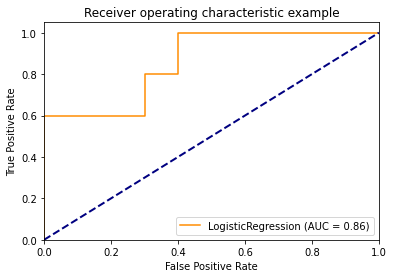

In [52]:
metrics.plot_roc_curve(reg, X_test, Y_true, color='darkorange') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()